# Discord Word Analysis

### Overview
In order to investigate the increase in activity in May of 2020 we are going to be using Python to do further analysis on the servers message contents.


In [13]:
import pandas as pd
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

nltk.download('stopwords')
nltk.download("wordnet")
nltk.download('omw-1.4')

df = pd.read_csv("all_messages_clean3.csv")
df.head(10)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\steph\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\steph\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\steph\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,Channel,Author,Year,Date,Time,Message
0,general,young nastyman,2023,2023-04-01,0:04:51,dammit
1,general,young nastyman,2023,2023-04-01,0:00:46,must be a bug
2,general,young nastyman,2023,2023-04-01,0:00:40,thats weird why does it keep banning marco
3,general,ptat,2023,2023-04-01,0:00:24,you should make a bot that randomly bans someo...
4,general,young nastyman,2023,2023-03-31,23:59:38,i think its working now i have to let it run
5,general,young nastyman,2023,2023-03-31,23:35:42,&collect
6,general,young nastyman,2023,2023-03-31,23:29:33,&collect
7,general,young nastyman,2023,2023-03-31,23:26:55,&collect
8,general,young nastyman,2023,2023-03-31,23:25:36,&collect
9,general,CIamam,2023,2023-03-31,14:38:39,I just know it


In [14]:
BOT_WORDS = ["file", "video", "image", "<@!", "https", "www"]
STOP_WORDS = list(stopwords.words('english')) + ["i", "you", "the", "a", "am", "like"]
VULGARITY = ['fuck', 'shit', 'fucking']
BOT_COMMANDS = ['play', 'skip', 'stop']

def strip_punct(word: str) -> str:
    for c in '-!@#$%^&*(())<<>?:"{}|[]\';,./':
        word = word.replace(c, '')
    return word

def extract_month(date_str: str) -> str:
    return date_str.split("-")[1]

df['Month'] = df["Date"].apply(extract_month)

def should_be_filtered(word: str) -> bool:
    if any([bot_word in word for bot_word in BOT_WORDS]):
        return True
    if len(word) == 0:
        return True
    if word.lower() in STOP_WORDS:
        return True
    if word.strip().isnumeric():
        return True
    if word.lower() in VULGARITY:
        return True
    if word.lower() in BOT_COMMANDS:
        return True
    return False

# Now we will split up each message into a list of lemmatized words so that they can be compared
lemmatizer = WordNetLemmatizer()

def lemmatize_message(msg: str) -> list[str]:
    reduced_words = [strip_punct(w).lower() for w in msg.split()]
    return [lemmatizer.lemmatize(word) for word in reduced_words if not should_be_filtered(word)]

df["Tokens"] = df["Message"].apply(lemmatize_message)

df.head()

,Channel,Author,Year,Date,Time,Message,Month,Tokens
0,general,young nastyman,2023,2023-04-01,0:04:51,dammit,04,[dammit]
1,general,young nastyman,2023,2023-04-01,0:00:46,must be a bug,04,"[must, bug]"
2,general,young nastyman,2023,2023-04-01,0:00:40,thats weird why does it keep banning marco,04,"[thats, weird, keep, banning, marco]"
3,general,ptat,2023,2023-04-01,0:00:24,you should make a bot that randomly bans someo...,04,"[make, bot, randomly, ban, someone, server]"
4,general,young nastyman,2023,2023-03-31,23:59:38,i think its working now i have to let it run,03,"[think, working, let, run]"


In [15]:
from collections import Counter
from pprint import pprint

def create_word_count_by_column(col: str, df: pd.DataFrame) -> dict:
    count_dict = {}
    new_df = df.groupby(col).agg({'Tokens': 'sum', col: 'first'})
    for index, row in new_df.iterrows():
        count_dict[row[col]] = Counter(row['Tokens'])
    return count_dict

pprint(create_word_count_by_column('Channel', df))

{'clips': Counter({'lol': 44,
                   'u': 19,
                   'falcon': 14,
                   'ganon': 13,
                   'pog': 13,
                   'thats': 12,
                   'yeah': 10,
                   'marth': 10,
                   'good': 9,
                   'character': 9,
                   'game': 9,
                   'got': 9,
                   'clip': 9,
                   'double': 9,
                   'playing': 8,
                   'sick': 8,
                   'cool': 8,
                   'lmao': 8,
                   'nair': 8,
                   'combo': 7,
                   'one': 7,
                   'lot': 7,
                   'oh': 7,
                   'hit': 7,
                   'fun': 6,
                   'pew': 6,
                   'falco': 6,
                   'roy': 6,
                   'get': 6,
                   'unranked': 6,
                   'matchup': 5,
                   'played': 5,
                   'l

Now that we have the full dataset with each message tokenized and filtered, we can proceed with the word analysis.

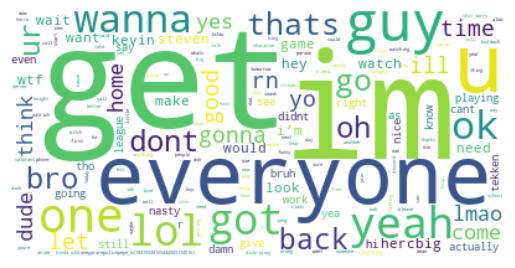

In [16]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def create_word_cloud(df: pd.DataFrame, index: str = 'Channel', category: str = 'general'):
    words = create_word_count_by_column(index, df)
    wordcloud = WordCloud(background_color = 'white').generate_from_frequencies(words[category])
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

create_word_cloud(df, 'Channel', 'general')

The above visualization is a word cloud of the entirety of the servers general channel. In order further investigate the increase in activity in 2020 we can narrow our search to that period of time.

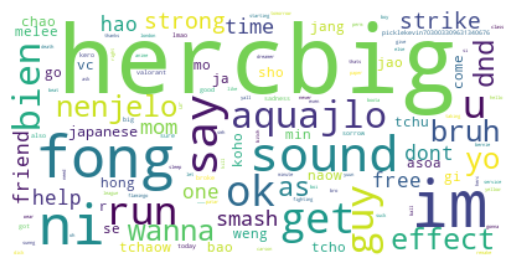

In [17]:
weird_year = df[df['Year'] == 2020]
create_word_cloud(weird_year, 'Month', '04')

The above visualization is a word cloud of the most frequently used words in April of 2020. Next we'll do the same thing except for the month of May.

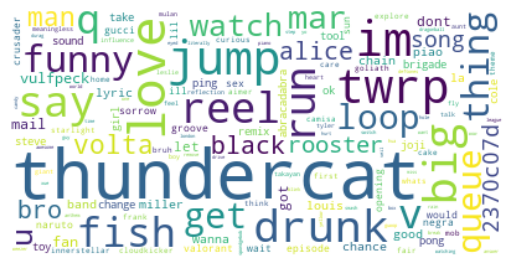

In [18]:
create_word_cloud(weird_year, 'Month', '05')

Its immediately evident that there is an increase in the number of words used from April to May of 2020. Although theres plenty of discussion about music, there seems to be an absense in discussion regarding COVID-19. Though this is unfortunate that we can't prove our hypothesis about the correlation between COVID-19 and the increase in activity, we can take an educated guess that this is probably case due to quarantine keeping everyone at home, giving them more time to spend on discord.

# Additional Word Clouds

### Clips channel

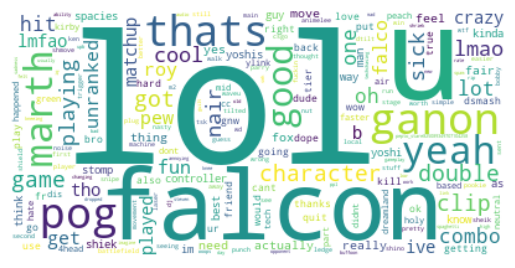

In [19]:
create_word_cloud(df, 'Channel', 'clips')

The above visualization is a word cloud of the entirety of the servers clips channel.

### Streams channel

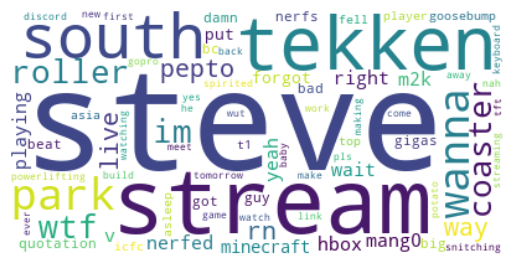

In [20]:
create_word_cloud(df, 'Channel', 'streams')

The above visualization is a word cloud of the entirety of the servers clips channel.

### Music channel

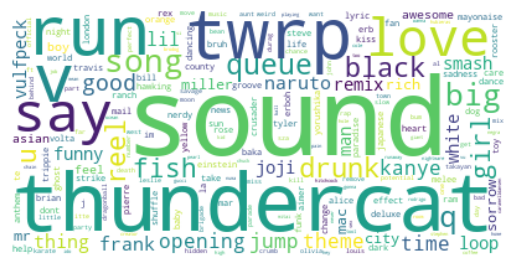

In [21]:
create_word_cloud(df, 'Channel', 'tombot')

The above visualization is a word cloud of the entirety of the servers music channel.